In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime

# Study data files
bitcoin_path = "Resources/coin_Bitcoin.csv"
ethereum_path = "Resources/coin_Ethereum.csv"
cardano_path = "Resources/coin_Cardano.csv"
dogecoin_path = "Resources/coin_Dogecoin.csv"
polkadot_path = "Resources/coin_Polkadot.csv"

# Read the crypto history data and form dataframes
bitcoinData = pd.read_csv(bitcoin_path)
ethereumData = pd.read_csv(ethereum_path)
cardanoData = pd.read_csv(cardano_path)
dogecoinData = pd.read_csv(dogecoin_path)
polkadotData = pd.read_csv(polkadot_path)

bitData_df = pd.DataFrame(bitcoinData)
ethData_df = pd.DataFrame(ethereumData)
adaData_df = pd.DataFrame(cardanoData)
dogeData_df = pd.DataFrame(dogecoinData)
dotData_df = pd.DataFrame(polkadotData)



In [2]:
# Creating bitcoin short dataset

bitData_df["Date"] = pd.to_datetime(bitData_df["Date"], format="%Y-%m-%d %H:%M:%S")
bitData_df["Year"] = bitData_df["Date"].dt.year
bitData_df["BTC Marketcap"] = bitData_df["Marketcap"]/1000000000 #in billions
bitData_df["BTC Volume"] = bitData_df["Volume"]/1000000000 #in billions
shortBitData_df = bitData_df[["Year","BTC Volume","BTC Marketcap"]]
bitDataplot_df = shortBitData_df.groupby("Year").mean()
btcVol_df = shortBitData_df[["Year", "BTC Volume"]].groupby("Year").mean()
btcMC_df = shortBitData_df[["Year","BTC Marketcap" ]].groupby("Year").mean()
# btcVol_df
# btcMC_df
# bitDataplot_df.plot(ylabel="in Billions")


In [3]:
# Creating Ethereum short dataset
ethData_df["Date"] = pd.to_datetime(ethData_df["Date"], format="%Y-%m-%d %H:%M:%S")
ethData_df["Year"] = ethData_df["Date"].dt.year
ethData_df["ETH Marketcap"] = ethData_df["Marketcap"]/1000000000 #in billions
ethData_df["ETH Volume"] = ethData_df["Volume"]/1000000000 #in billions
shortEthData_df = ethData_df[["Year","ETH Volume","ETH Marketcap"]]
ethDataplot_df = shortEthData_df.groupby("Year").mean()
ethVol_df = shortEthData_df[["Year", "ETH Volume"]].groupby("Year").mean()
ethMC_df = shortEthData_df[["Year","ETH Marketcap" ]].groupby("Year").mean()
# ethVol_df
# ethMC_df
# ethDataplot_df.plot(ylabel="in Billions")

In [4]:
# Creating Cardano short dataset
adaData_df["Date"] = pd.to_datetime(adaData_df["Date"], format="%Y-%m-%d %H:%M:%S")
adaData_df["Year"] = adaData_df["Date"].dt.year
adaData_df["ADA Marketcap"] = adaData_df["Marketcap"]/1000000000 #in billions
adaData_df["ADA Volume"] = adaData_df["Volume"]/1000000000 #in billions
shortAdaData_df = adaData_df[["Year","ADA Volume","ADA Marketcap"]]
adaDataplot_df = shortAdaData_df.groupby("Year").mean()
adaVol_df = shortAdaData_df[["Year", "ADA Volume"]].groupby("Year").mean()
adaMC_df = shortAdaData_df[["Year","ADA Marketcap" ]].groupby("Year").mean()
# adaVol_df
# adaMC_df
# adaDataplot_df.plot(ylabel="in Billions")

In [5]:
# Creating Dogecoin short dataset
dogeData_df["Date"] = pd.to_datetime(dogeData_df["Date"], format="%Y-%m-%d %H:%M:%S")
dogeData_df["Year"] = dogeData_df["Date"].dt.year
dogeData_df["DOGE Marketcap"] = dogeData_df["Marketcap"]/1000000000 #in billions
dogeData_df["DOGE Volume"] = dogeData_df["Volume"]/1000000000 #in billions
shortDogeData_df = dogeData_df[["Year","DOGE Volume","DOGE Marketcap"]]
dogeDataplot_df = shortDogeData_df.groupby("Year").mean()
dogeVol_df = shortDogeData_df[["Year", "DOGE Volume"]].groupby("Year").mean()
dogeMC_df = shortDogeData_df[["Year","DOGE Marketcap" ]].groupby("Year").mean()
# dogeVol_df
# dogeMC_df
# dogeDataplot_df.plot(ylabel="in Billions")

In [6]:
# Creating Polkadot short dataset
dotData_df["Date"] = pd.to_datetime(dotData_df["Date"], format="%Y-%m-%d %H:%M:%S")
dotData_df["Year"] = dotData_df["Date"].dt.year
dotData_df["DOT Marketcap"] = dotData_df["Marketcap"]/1000000000 #in billions
dotData_df["DOT Volume"] = dotData_df["Volume"]/1000000000 #in billions
shortDotData_df = dotData_df[["Year","DOT Volume","DOT Marketcap"]]
dotDataplot_df = shortDotData_df.groupby("Year").mean()
dotVol_df = shortDotData_df[["Year", "DOT Volume"]].groupby("Year").mean()
dotMC_df = shortDotData_df[["Year","DOT Marketcap" ]].groupby("Year").mean()
# dotVol_df
# dotMC_df
# dotDataplot_df.plot(ylabel="in Billions")

## Coin Marketcaps

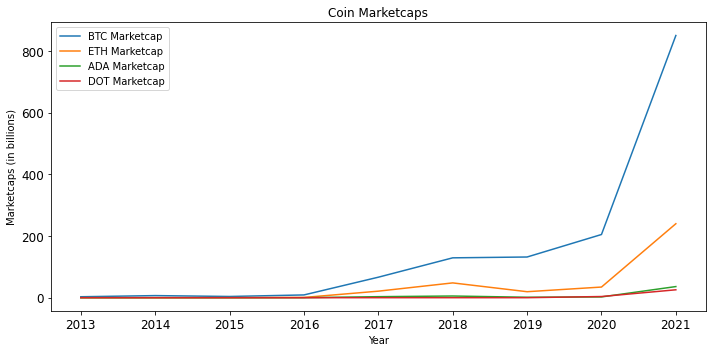

In [7]:
# Merge all lists on Year for full Chart
# Marketcap Merges

merge1 = btcMC_df.merge(ethMC_df, on="Year", how="outer")
merge2 = merge1.merge(adaMC_df, on="Year", how="outer")
merge3 = merge2.merge(dogeMC_df, on="Year", how="outer")
coinMCs_df = merge2.merge(dotMC_df, on="Year", how="outer").fillna(value=0)
coinMCs_df.plot(title="Coin Marketcaps", ylabel="Marketcaps (in billions)",fontsize=12,figsize=(10,5))
plt.tight_layout()

In [8]:
coinMCs_df

,BTC Marketcap,ETH Marketcap,ADA Marketcap,DOT Marketcap
Year,,,,
2013,3.066581,0.000000,0.000000,0.000000
2014,6.782807,0.000000,0.000000,0.000000
2015,3.922142,0.067883,0.000000,0.000000
2016,8.929758,0.803339,0.000000,0.000000
2017,66.457516,21.169435,3.309046,0.000000
2018,129.267317,47.971835,5.433568,0.000000
2019,131.945746,19.413398,1.438918,0.000000
2020,204.917525,34.500795,2.436553,3.769133
2021,850.308419,239.910890,36.073728,25.611960


## Coin Volumes

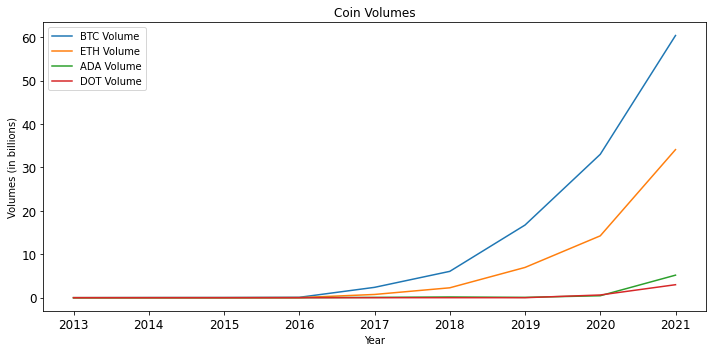

In [9]:
# Volume Merges

merge1 = btcVol_df.merge(ethVol_df, on="Year", how="outer")
merge2 = merge1.merge(adaVol_df, on="Year", how="outer")
merge3 = merge2.merge(dogeVol_df, on="Year", how="outer")
coinVols_df = merge2.merge(dotVol_df, on="Year", how="outer").fillna(value=0)
coinVols_df.plot(title="Coin Volumes", ylabel="Volumes (in billions)",fontsize=12,figsize=(10,5))
plt.tight_layout()

In [10]:
coinVols_df

,BTC Volume,ETH Volume,ADA Volume,DOT Volume
Year,,,,
2013,0.000567,0.000000,0.000000,0.000000
2014,0.025094,0.000000,0.000000,0.000000
2015,0.033906,0.000824,0.000000,0.000000
2016,0.085925,0.017978,0.000000,0.000000
2017,2.382867,0.743275,0.070210,0.000000
2018,6.063552,2.276869,0.162666,0.000000
2019,16.730488,6.967028,0.073491,0.000000
2020,33.023274,14.245277,0.449771,0.623268
2021,60.383060,34.104041,5.189059,2.990308


## Complete Volumes and Marketcaps

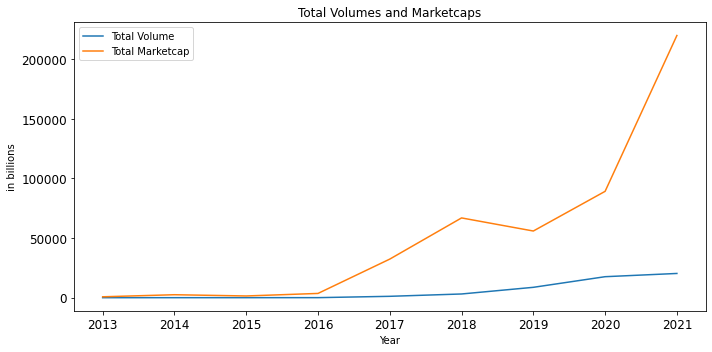

In [11]:
# Create complete list for coins volumes and marketcaps
allCoins_df = pd.concat([bitData_df, ethData_df,adaData_df,dogeData_df,dotData_df])
allCoins_df["Date"] = pd.to_datetime(allCoins_df["Date"], format="%Y-%m-%d %H:%M:%S")
allCoins_df["Year"] = allCoins_df["Date"].dt.year
tempAC= allCoins_df[["Year","Name","Volume","Marketcap"]].groupby(["Year","Name"]).sum().reset_index()
shortData_df = tempAC.groupby("Year").sum()
shortData_df["Total Marketcap"] = shortData_df["Marketcap"]/1000000000 #in billions
shortData_df["Total Volume"] = shortData_df["Volume"]/1000000000 #in billions
totalData_df = shortData_df[["Total Volume","Total Marketcap"]]
totalVols_df = totalData_df["Total Volume"]
totalMCs_df = totalData_df["Total Marketcap"]
# totalData_df.plot()
# totalVols_df.plot(title="Total Coin Volumes", ylabel="Volumes (in billions)",fontsize=12,figsize=(10,5))
totalData_df.plot(title="Total Volumes and Marketcaps", ylabel="in billions",fontsize=12,figsize=(10,5))
plt.tight_layout()

In [58]:
yoyVol= []
yoyMC = []
years = list(totalData_df.index)

for year in years:
    try:
        volChange = (totalData_df["Total Volume"][(year+1)] - totalData_df["Total Volume"][year])/totalData_df["Total Volume"][year]
        mcChange = (totalData_df["Total Volume"][(year+1)] - totalData_df["Total Volume"][year])/totalData_df["Total Volume"][year]
        yoyVol.append(volChange*100)
        yoyMC.append(mcChange*100)
    except (KeyError, IndexError):
        print()
print(yoyVol)
totalData_df


[6652.991613218927, 31.21668052432148, 203.5815991284227, 2920.603421802392, 170.21401920054345, 179.36862593420545, 102.42495070739213, 15.45325559170939]


,Total Volume,Total Marketcap,Volume YOY Change,Marketcap YOY Change
Year,,,,
2013,0.141715,757.548729,NaN,NaN
2014,9.569991,2486.748180,66.529916,228.262471
2015,12.557425,1446.698408,0.312167,-41.823687
2016,38.122030,3571.361048,2.035816,146.862859
2017,1151.515354,32349.751325,29.206034,805.810163
2018,3111.555921,66857.703281,1.702140,106.671460
2019,8692.711020,55883.746943,1.793686,-16.413900
2020,17596.215998,89146.124573,1.024250,59.520665
2021,20315.404231,219754.572985,0.154533,146.510517


## Coin YOY changes

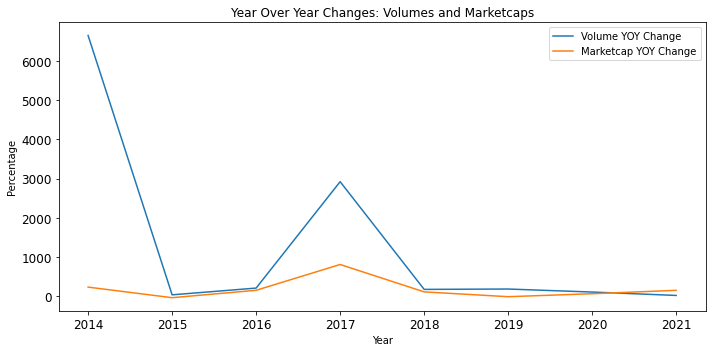

In [62]:
totalData_df["Volume YOY Change"] = totalData_df["Total Volume"].pct_change()*100
totalData_df["Marketcap YOY Change"] = totalData_df["Total Marketcap"].pct_change()*100
yoyData_df = totalData_df[["Volume YOY Change","Marketcap YOY Change"]].loc[2013:2021]
yoyData_df.plot(title="Year Over Year Changes: Volumes and Marketcaps", ylabel="Percentage",fontsize=12,figsize=(10,5))
plt.tight_layout()

In [63]:
totalData_df

,Total Volume,Total Marketcap,Volume YOY Change,Marketcap YOY Change
Year,,,,
2013,0.141715,757.548729,NaN,NaN
2014,9.569991,2486.748180,6652.991613,228.262471
2015,12.557425,1446.698408,31.216681,-41.823687
2016,38.122030,3571.361048,203.581599,146.862859
2017,1151.515354,32349.751325,2920.603422,805.810163
2018,3111.555921,66857.703281,170.214019,106.671460
2019,8692.711020,55883.746943,179.368626,-16.413900
2020,17596.215998,89146.124573,102.424951,59.520665
2021,20315.404231,219754.572985,15.453256,146.510517


In [15]:
# Correlation between volume and marketcap with regression line (for David)

completeData_df = pd.concat([bitData_df,ethData_df,adaData_df,dogeData_df,dotData_df])
# completeData_df["Date"] = pd.to_datetime(allCoins_df["Date"], format="%Y-%m-%d %H:%M:%S")
# completeData_df["Year"] = completeData_df["Date"].dt.year
# # completeVol_df = completeData_df[["Date","Volume"]]
# # completeMC_df = completeData_df[["Date","Marketcap"]]
completeData_df["Profit/Loss"] = completeData_df["Close"] - completeData_df["Open"] 
completeData_df[["Name","High","Low","Open","Close","Profit/Loss"]]


,Name,High,Low,Open,Close,Profit/Loss
0,Bitcoin,147.488007,134.000000,134.444000,144.539993,10.095993
1,Bitcoin,146.929993,134.050003,144.000000,139.000000,-5.000000
2,Bitcoin,139.889999,107.720001,139.000000,116.989998,-22.010002
3,Bitcoin,125.599998,92.281898,116.379997,105.209999,-11.169998
4,Bitcoin,108.127998,79.099998,106.250000,97.750000,-8.500000
...,...,...,...,...,...,...
315,Polkadot,15.469187,14.675115,15.219061,15.340774,0.121714
316,Polkadot,15.776978,15.068263,15.321934,15.553716,0.231782
317,Polkadot,16.579445,15.221813,15.553584,16.014026,0.460442
318,Polkadot,15.996540,14.788740,15.996540,15.235582,-0.760957


In [16]:
#NOTES
# bitData_df.set_index(["Date"]).loc["2015"]
# bitData_df.loc["2015":"2019"]
# test.plot(figsize=(20,10),rot=90)